In [98]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from scipy import stats
import math
from PIL import Image

In [100]:
# Open data set, drop unnecessary columns, set up predictor and target variables
df2 = pd.read_csv("kc_house_data_clean.csv")
df2 =df2.drop(["Unnamed: 0"], axis = 1)
y = df2["price"]
X = df2.drop(columns=["price","Renovated"], axis=1)

In [102]:
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Income,Renovated,year_sold,house_age_at_sale
0,164,221900.0,3,1.00,1180,5650,1.0,0,4,0,...,2014,66,47.5112,-122.257,1340,5650,113555.0,No,2014,0.0
1,52,205425.0,2,1.00,880,6780,1.0,0,4,2,...,2014,66,47.5009,-122.248,1190,6780,113555.0,No,2014,0.0
2,76,445000.0,3,2.25,2100,8201,1.0,0,0,0,...,2014,66,47.5091,-122.244,2660,8712,113555.0,No,2014,0.0
3,146,236000.0,3,1.00,1300,5898,1.0,0,4,0,...,2014,66,47.5053,-122.255,1320,7619,113555.0,NaN,2014,0.0
4,292,170000.0,2,1.00,860,5265,1.0,0,4,0,...,2015,66,47.5048,-122.272,1650,8775,113555.0,No,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,154,2720000.0,4,3.25,3990,18115,2.0,0,4,2,...,2014,24,47.6177,-122.229,3450,16087,7190.0,NaN,2014,0.0
21416,84,1950000.0,4,3.50,4065,18713,2.0,0,4,2,...,2014,24,47.6209,-122.237,3070,18713,7190.0,No,2014,0.0
21417,345,2250000.0,5,5.25,3410,8118,2.0,0,4,0,...,2015,24,47.6295,-122.236,3410,16236,7190.0,No,2015,0.0
21418,195,2900000.0,5,4.00,5190,14600,2.0,0,2,0,...,2014,24,47.6102,-122.225,3840,19250,7190.0,No,2014,0.0


In [ ]:
model = sm.OLS(y, sm.add_constant(X.astype(float)), missing = "drop").fit()
results = model.summary()
print(results)

Function to test linearity assumptions

In [4]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [14]:
#plot predictor against target to see if linearity assumption is met
sns.scatterplot(x=X, y=y)

ValueError: Shape of passed values is (21, 2), indices imply (21420, 2)

In [1]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the target. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [5]:
linear_assumption(model, X, y)

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


ValueError: shapes (21420,21) and (22,) not aligned: 21 (dim 1) != 22 (dim 0)

In [15]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

    

/Users/sallypants/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: regplot inputs must be 1d

<Figure size 432x288 with 0 Axes>

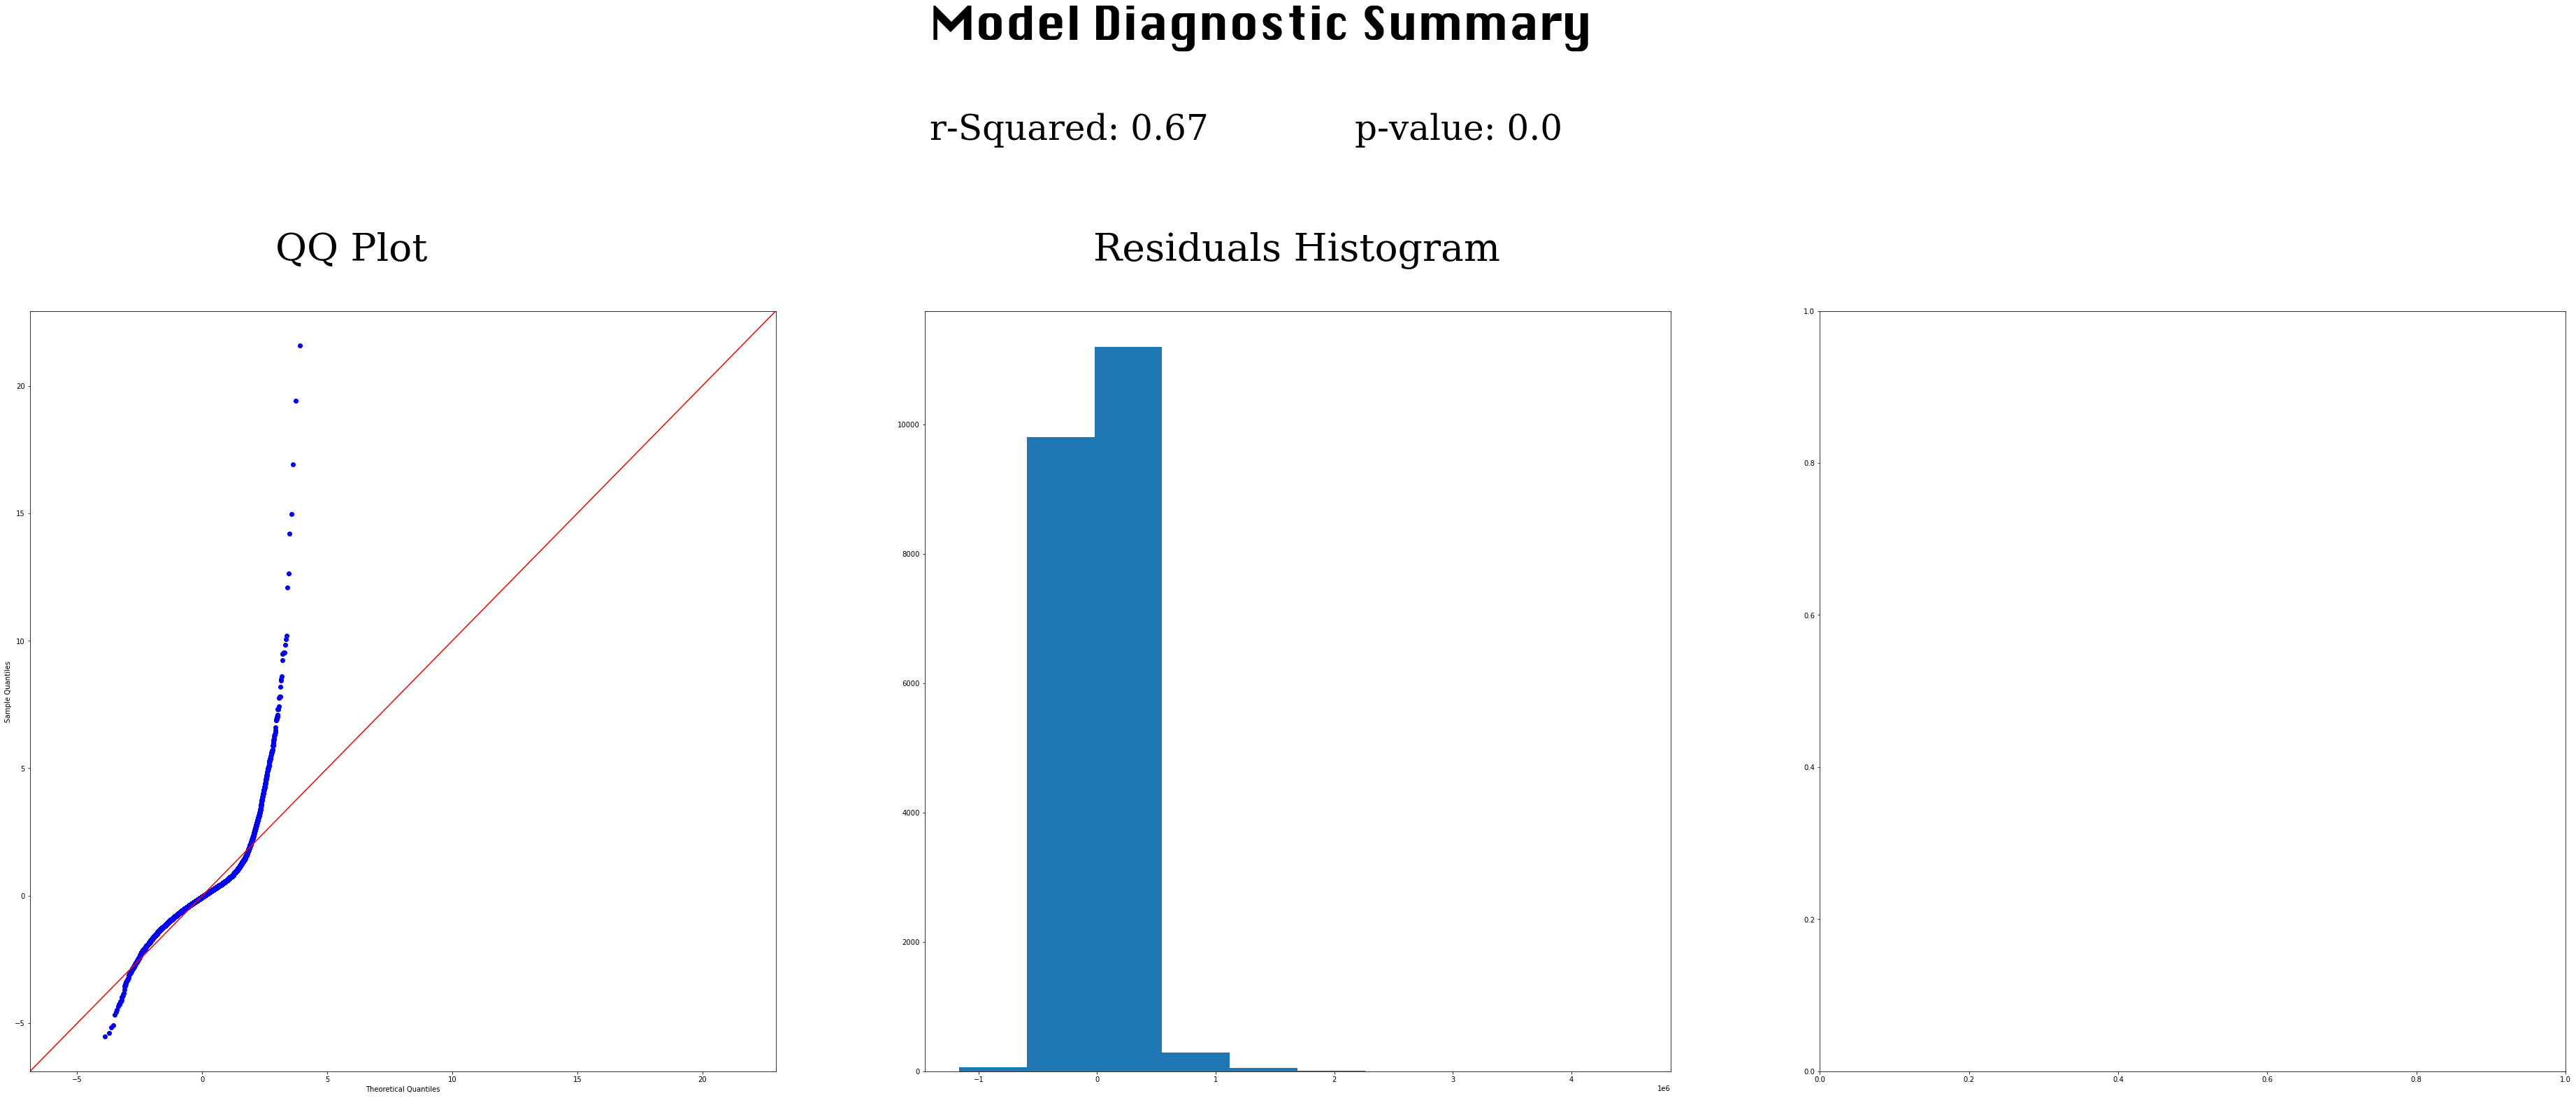

In [18]:
model_diagnostic(model, X, 'X variables', df2.price)

In [93]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
residuals = model.resid

def model_diagnostics(model, y):
#     fix,axes =plt.subplots(nrows=1, ncols=3)
#     residuals = model.resid
#     ax1=sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)    
#     plt.show;
#     axes[0][1].set_title('QQ Plot')
    fig1=sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True,)
    plt.title("Q-Q Graph to test for normality of errors")
    
    fig2=sm.graphics.plot_fit(model,1, vlines=False)
    plt.title("Fitted values versus Predictor");

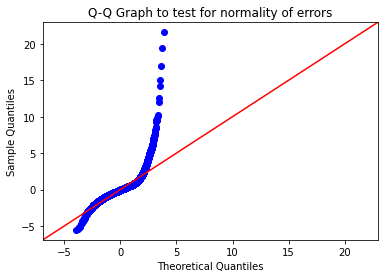

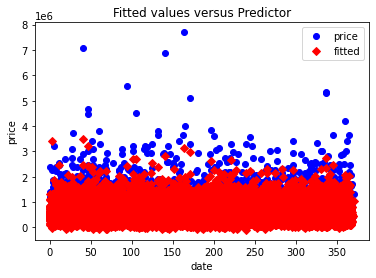

In [94]:
model_diagnostics(model, y)

In [97]:
fig = sm.graphics.plot_regress_exog(model, df2.price, fig=fig)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().